# TURNSTILE LOVE CONNECTION - Album Analysis
Comparing energy, aggression, and vibes across all tracks

In [28]:
import json
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import ipywidgets as widgets
from IPython.display import display, clear_output
import librosa
import librosa.display

plt.style.use('dark_background')
%matplotlib inline

In [40]:
# Load all analysis files
analysis_files = sorted(Path('analysis').glob('*_analysis.json'))

print(f"Loading {len(analysis_files)} tracks...")
tracks = []

for i, f in enumerate(analysis_files, 1):
    print(f"  [{i}/{len(analysis_files)}] {f.name[:30]}...", end=' ')
    
    try:
        with open(f, 'r') as file:
            data = json.load(file)
        
        # Load all frame data
        energy = np.array(data['frames']['energy'])
        brightness = np.array(data['frames']['brightness'])
        harshness = np.array(data['frames']['harshness'])
        percussion = np.array(data['frames'].get('percussion', [0] * len(energy)))
        
        # Load local tempo if available (new structure: separate object)
        local_tempo_data = data.get('local_tempo', None)
        if local_tempo_data:
            local_tempo_times = np.array(local_tempo_data['times'])
            local_tempo_bpm = np.array(local_tempo_data['bpm'])
            local_tempo_norm = np.array(local_tempo_data['normalized'])
        else:
            local_tempo_bpm = None
            local_tempo_norm = None
            local_tempo_times = None
        
        tracks.append({
            'filename': data['filename'],
            'title': data['filename'].replace('.m4a', '').split(' ', 1)[1] if ' ' in data['filename'] else data['filename'],
            'tempo': data['tempo'],
            'duration': data['duration'],
            'times': np.array(data['frames']['times']),
            'energy': energy,
            'brightness': brightness,
            'harshness': harshness,
            'percussion': percussion,
            'beats': np.array(data['beats']),
            'local_tempo_times': local_tempo_times,
            'local_tempo': local_tempo_bpm,
            'local_tempo_norm': local_tempo_norm
        })
        print("✓")
        
    except Exception as e:
        print(f"✗ Error: {e}")

print(f"\n{'='*60}")
print(f"Loaded {len(tracks)} tracks from analysis/ folder")
has_tempo = tracks[0]['local_tempo'] is not None if tracks else False
has_percussion = np.any(tracks[0]['percussion'] > 0) if tracks else False
print(f"Local tempo data: {'✓ Available' if has_tempo else '✗ Not found'}")
print(f"Percussion data: {'✓ Available' if has_percussion else '✗ Not found (rerun analyze_all_tracks.py)'}")
print(f"{'='*60}\n")

for i, t in enumerate(tracks, 1):
    print(f"{i:2d}. {t['title']:<30s} {t['tempo']:>6.1f} BPM  {t['duration']/60:>4.1f} min")

Loading 14 tracks...
  [1/14] 01 NEVER ENOUGH_analysis.json... ✓
  [2/14] 02 SOLE_analysis.json... ✓
  [3/14] 03 I CARE_analysis.json... ✓
  [4/14] 04 DREAMING_analysis.json... ✓
  [5/14] 05 LIGHT DESIGN_analysis.json... ✓
  [6/14] 06 DULL_analysis.json... ✓
  [7/14] 07 SUNSHOWER_analysis.json... ✓
  [8/14] 08 LOOK OUT FOR ME_analysis.js... ✓
  [9/14] 09 CEILING_analysis.json... ✓
  [10/14] 10 SEEIN' STARS_analysis.json... ✓
  [11/14] 11 BIRDS_analysis.json... ✓
  [12/14] 12 SLOWDIVE_analysis.json... ✓
  [13/14] 13 TIME IS HAPPENING_analysis.... ✓
  [14/14] 14 MAGIC MAN_analysis.json... ✓

Loaded 14 tracks from analysis/ folder
Local tempo data: ✓ Available
Percussion data: ✓ Available

 1. NEVER ENOUGH                    152.0 BPM   4.8 min
 2. SOLE                            143.6 BPM   3.4 min
 3. I CARE                           83.4 BPM   3.9 min
 4. DREAMING                        103.4 BPM   2.6 min
 5. LIGHT DESIGN                    172.3 BPM   2.2 min
 6. DULL                

## Raw Waveforms - All Tracks
Load and display the actual audio waveforms for visual comparison.

In [41]:
# Load all audio files (this takes a minute or two)
music_dir = Path('music')
audio_files = sorted(list(music_dir.glob('*.m4a')) + list(music_dir.glob('*.mp3')))

print(f"Loading {len(audio_files)} audio files...")
waveforms = []

for i, f in enumerate(audio_files, 1):
    print(f"  [{i}/{len(audio_files)}] {f.name[:40]}...", end=' ', flush=True)
    y, sr = librosa.load(f)
    waveforms.append({
        'name': f.stem,
        'y': y,
        'sr': sr,
        'duration': len(y) / sr
    })
    print(f"✓ ({len(y)/sr:.1f}s)")

print(f"\n✓ Loaded {len(waveforms)} waveforms")

Loading 14 audio files...
  [1/14] 01 NEVER ENOUGH.m4a... 

/var/folders/xs/qsp6mbzs7k530q9z25kyjg300000gn/T/ipykernel_52781/856266165.py:10: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(f)
/Users/jerryhong/miniconda3/envs/turnstile/lib/python3.10/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


✓ (287.2s)
  [2/14] 02 SOLE.m4a... ✓ (205.2s)
  [3/14] 03 I CARE.m4a... ✓ (233.1s)
  [4/14] 04 DREAMING.m4a... ✓ (156.5s)
  [5/14] 05 LIGHT DESIGN.m4a... ✓ (129.7s)
  [6/14] 06 DULL.m4a... ✓ (138.7s)
  [7/14] 07 SUNSHOWER.m4a... ✓ (220.5s)
  [8/14] 08 LOOK OUT FOR ME.m4a... ✓ (403.5s)
  [9/14] 09 CEILING.m4a... ✓ (73.0s)
  [10/14] 10 SEEIN' STARS.m4a... ✓ (186.3s)
  [11/14] 11 BIRDS.m4a... ✓ (146.9s)
  [12/14] 12 SLOWDIVE.m4a... ✓ (213.2s)
  [13/14] 13 TIME IS HAPPENING.m4a... ✓ (126.5s)
  [14/14] 14 MAGIC MAN.m4a... ✓ (193.9s)

✓ Loaded 14 waveforms


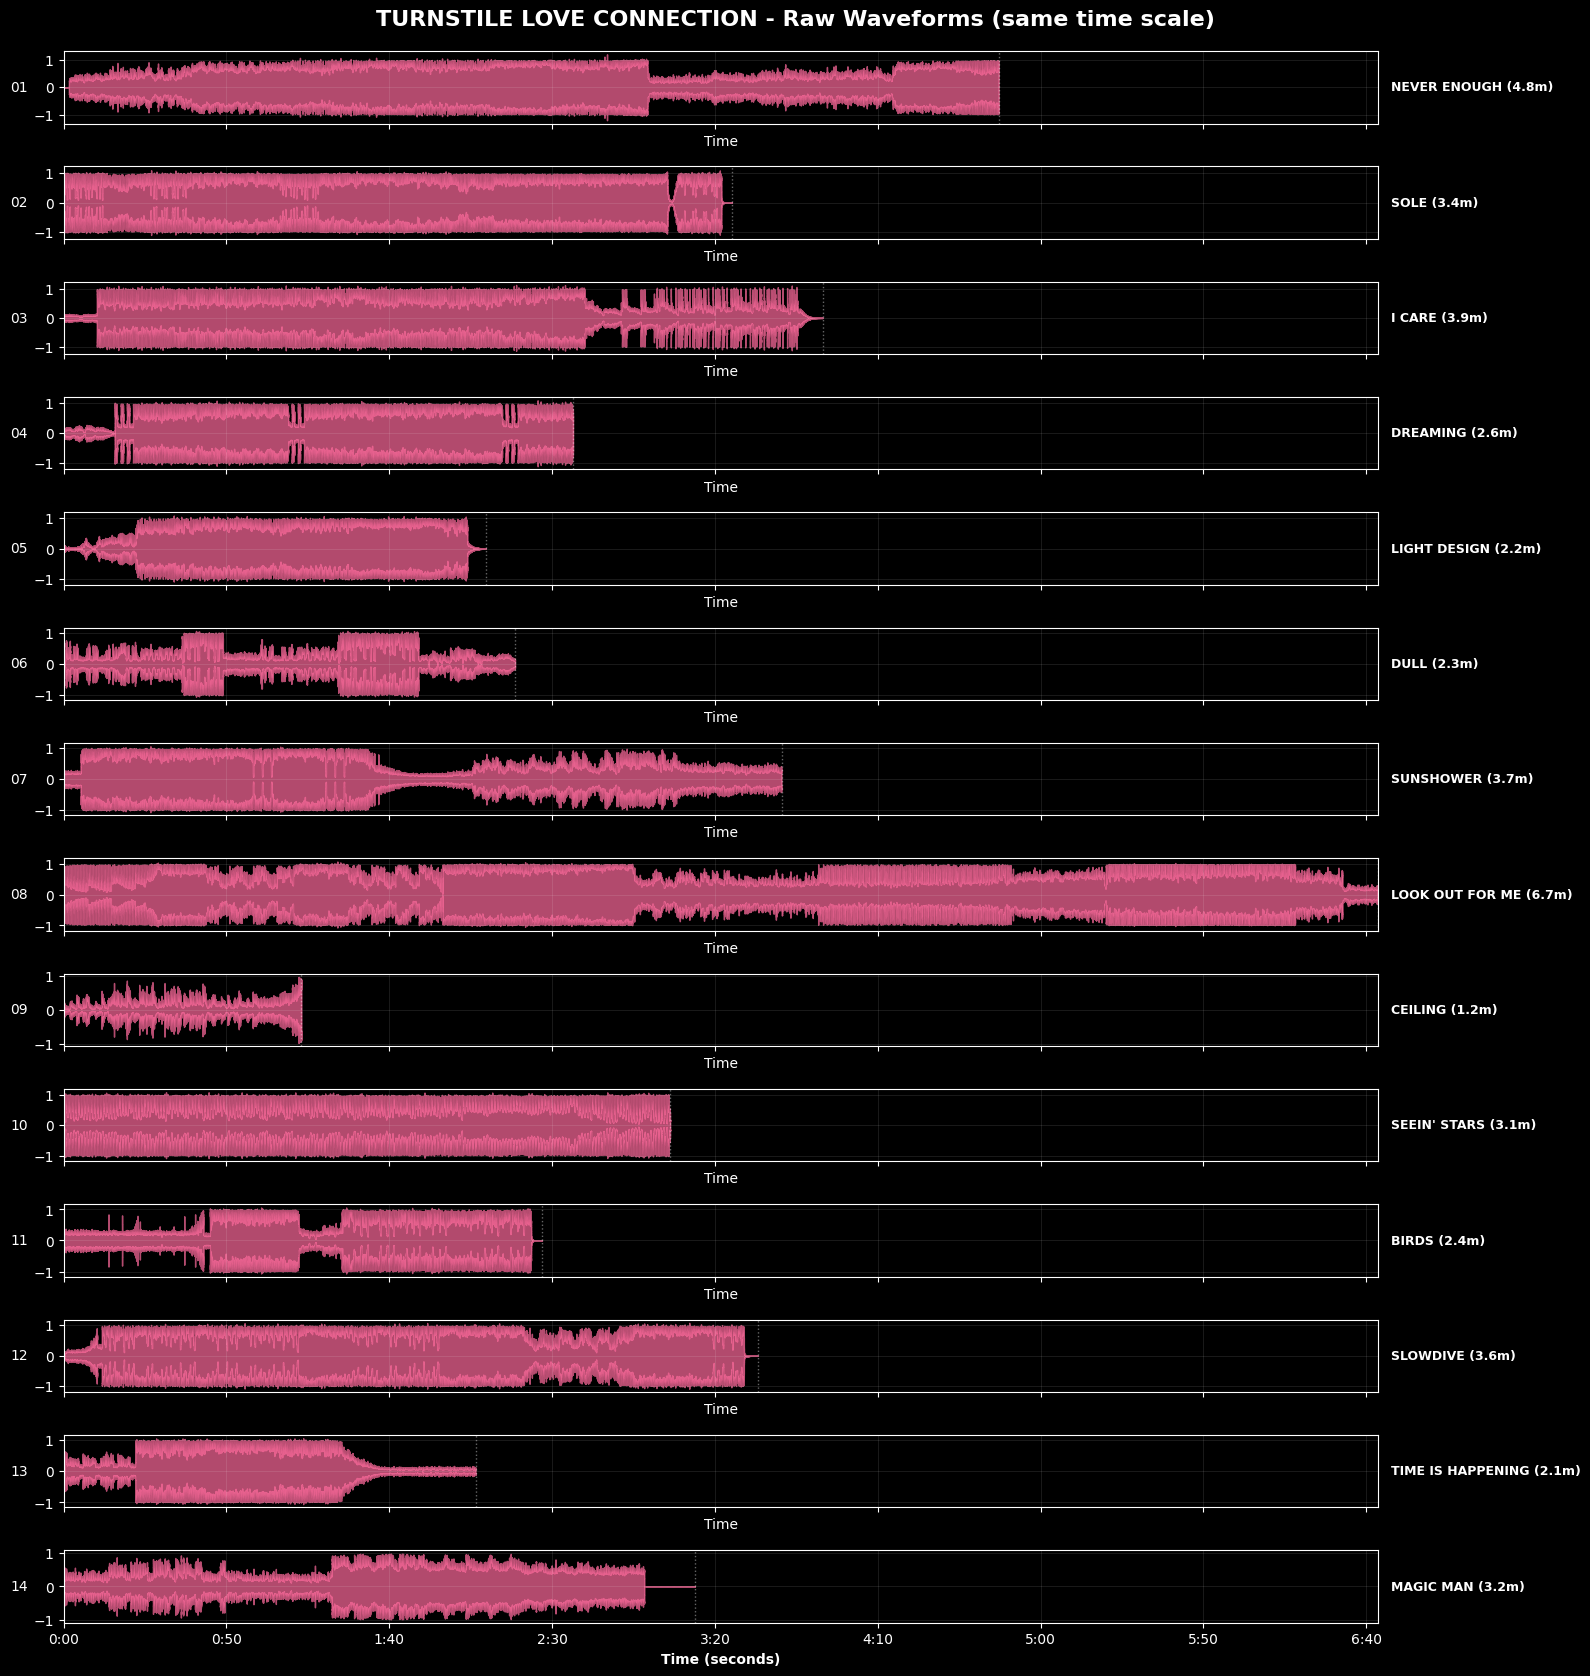

In [43]:
# Plot all waveforms stacked
n_tracks = len(waveforms)
max_duration = max(w['duration'] for w in waveforms)

fig, axes = plt.subplots(n_tracks, 1, figsize=(16, n_tracks * 1.2), sharex=True)

if n_tracks == 1:
    axes = [axes]

for i, wf in enumerate(waveforms):
    ax = axes[i]
    
    # Plot waveform
    librosa.display.waveshow(wf['y'], sr=wf['sr'], ax=ax, color='#ff6b9d', alpha=0.7)
    
    # Styling
    ax.set_xlim(0, max_duration)
    ax.set_ylabel(f"{i+1:02d}", fontsize=10, rotation=0, ha='right', va='center')
    ax.grid(alpha=0.1)
    
    # Track end marker
    ax.axvline(wf['duration'], color='white', linestyle=':', alpha=0.4, linewidth=1)
    
    # Title on the right
    title = wf['name'].split(' ', 1)[1] if ' ' in wf['name'] else wf['name']
    ax.text(1.01, 0.5, f"{title} ({wf['duration']/60:.1f}m)", 
            transform=ax.transAxes, fontsize=9, va='center', fontweight='bold')
    
    # Only show x-label on bottom
    if i == n_tracks - 1:
        ax.set_xlabel('Time (seconds)', fontsize=10, fontweight='bold')

plt.suptitle('TURNSTILE LOVE CONNECTION - Raw Waveforms (same time scale)', 
             fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

Creating continuous album waveform...


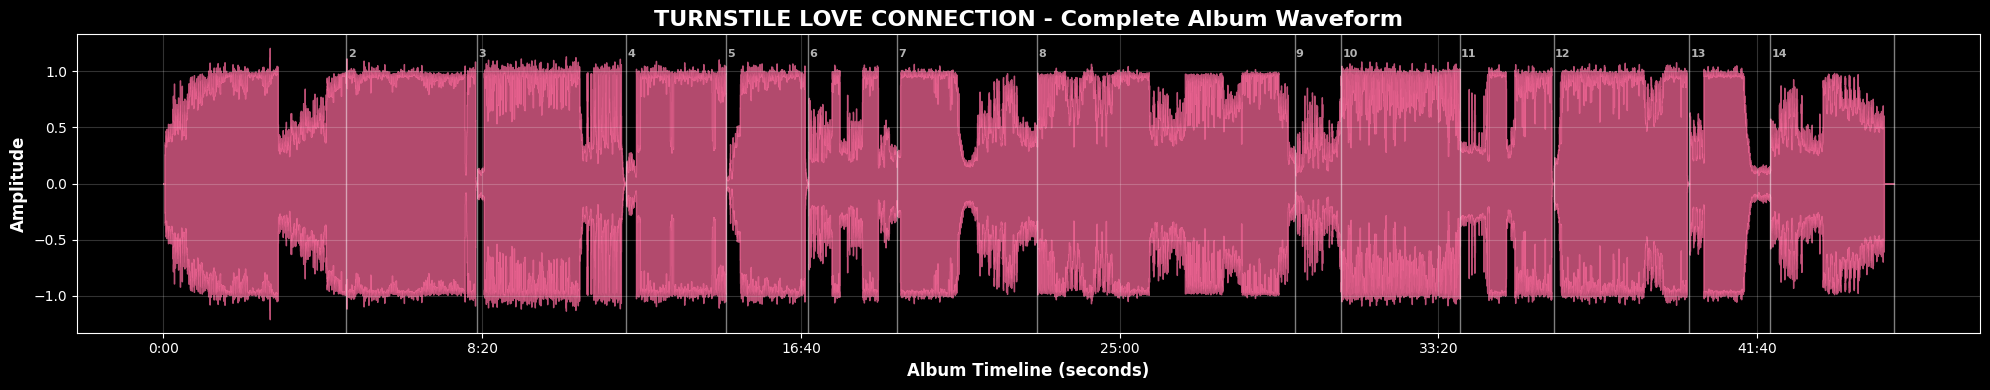

Total album duration: 45.2 minutes


In [44]:
# Continuous album waveform (all tracks stitched together)
print("Creating continuous album waveform...")

# Concatenate all waveforms (resample to common sr if needed)
target_sr = waveforms[0]['sr']
album_waveform = np.concatenate([w['y'] for w in waveforms])
album_duration = len(album_waveform) / target_sr

# Track boundaries
track_boundaries = [0]
current_time = 0
for w in waveforms:
    current_time += w['duration']
    track_boundaries.append(current_time)

# Plot
fig, ax = plt.subplots(figsize=(20, 4))
librosa.display.waveshow(album_waveform, sr=target_sr, ax=ax, color='#ff6b9d', alpha=0.7)

# Add track boundaries
for i, boundary in enumerate(track_boundaries):
    if i == 0:
        continue
    ax.axvline(boundary, color='white', linestyle='-', alpha=0.5, linewidth=1)
    if i < len(waveforms):
        ax.text(boundary + 2, ax.get_ylim()[1] * 0.85, f"{i+1}", 
                fontsize=8, alpha=0.7, fontweight='bold')

ax.set_xlabel('Album Timeline (seconds)', fontsize=12, fontweight='bold')
ax.set_ylabel('Amplitude', fontsize=12, fontweight='bold')
ax.grid(alpha=0.2)

plt.title('TURNSTILE LOVE CONNECTION - Complete Album Waveform', 
          fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print(f"Total album duration: {album_duration/60:.1f} minutes")

## Interactive Aggression Formula Tuner
Adjust the weights for each component and see how it changes track rankings in real-time.

In [45]:
# Create sliders for each weight
energy_slider = widgets.FloatSlider(value=0.25, min=0, max=1, step=0.05, description='Energy:',
                                     style={'description_width': '80px'}, layout=widgets.Layout(width='400px'))
brightness_slider = widgets.FloatSlider(value=0.25, min=0, max=1, step=0.05, description='Brightness:',
                                         style={'description_width': '80px'}, layout=widgets.Layout(width='400px'))
harshness_slider = widgets.FloatSlider(value=0.25, min=0, max=1, step=0.05, description='Harshness:',
                                        style={'description_width': '80px'}, layout=widgets.Layout(width='400px'))
percussion_slider = widgets.FloatSlider(value=0.25, min=0, max=1, step=0.05, description='Percussion:',
                                         style={'description_width': '80px'}, layout=widgets.Layout(width='400px'))

# Output area for the plot
output = widgets.Output()

# Label showing current weights sum
weights_label = widgets.HTML(value='<b>Total: 1.00</b> (weights are normalized)')

def calculate_aggression(track, w_energy, w_brightness, w_harshness, w_percussion):
    """Calculate aggression with given weights (auto-normalized)"""
    total = w_energy + w_brightness + w_harshness + w_percussion
    if total == 0:
        return np.zeros_like(track['energy'])
    
    # Normalize weights
    w_e = w_energy / total
    w_b = w_brightness / total
    w_h = w_harshness / total
    w_p = w_percussion / total
    
    return (track['energy'] * w_e + 
            track['brightness'] * w_b + 
            track['harshness'] * w_h + 
            track['percussion'] * w_p)

def update_plot(change=None):
    w_e = energy_slider.value
    w_b = brightness_slider.value
    w_h = harshness_slider.value
    w_p = percussion_slider.value
    
    total = w_e + w_b + w_h + w_p
    if total > 0:
        weights_label.value = f'<b>Normalized:</b> Energy {w_e/total:.0%}, Brightness {w_b/total:.0%}, Harshness {w_h/total:.0%}, Percussion {w_p/total:.0%}'
    else:
        weights_label.value = '<b style="color:red">Set at least one weight > 0</b>'
        return
    
    with output:
        clear_output(wait=True)
        
        # Calculate stats for each track with current weights
        stats = []
        for track in tracks:
            agg = calculate_aggression(track, w_e, w_b, w_h, w_p)
            stats.append({
                'title': track['title'],
                'avg_aggression': np.mean(agg),
                'aggressive_pct': (np.sum(agg > 0.5) / len(agg)) * 100,
            })
        
        # Sort by average aggression
        stats_sorted = sorted(stats, key=lambda x: x['avg_aggression'], reverse=True)
        
        # Create bar chart
        fig, ax = plt.subplots(figsize=(14, 8))
        
        titles = [s['title'] for s in stats_sorted]
        avgs = [s['avg_aggression'] for s in stats_sorted]
        colors = plt.cm.plasma(np.array(avgs))
        
        bars = ax.barh(range(len(titles)), avgs, color=colors, alpha=0.8)
        ax.set_yticks(range(len(titles)))
        ax.set_yticklabels(titles, fontsize=10)
        ax.set_xlabel('Average Aggression Score', fontsize=12, fontweight='bold')
        ax.set_xlim(0, 1)
        ax.axvline(0.5, color='cyan', linestyle='--', alpha=0.5, label='50% threshold')
        ax.invert_yaxis()
        ax.grid(axis='x', alpha=0.3)
        
        # Add values on bars
        for i, (bar, val) in enumerate(zip(bars, avgs)):
            ax.text(val + 0.02, i, f'{val:.2f}', va='center', fontsize=9, alpha=0.8)
        
        plt.title('Tracks Ranked by Aggression (with current weights)', fontsize=14, fontweight='bold')
        plt.tight_layout()
        plt.show()
        
        # Print rankings
        print("\nRankings:")
        for i, s in enumerate(stats_sorted, 1):
            print(f"{i:2d}. {s['title']:<30s} {s['avg_aggression']:.2f}")
        print(f"\nAlbum average: {np.mean(avgs):.2f}")

# Connect sliders to update function
energy_slider.observe(update_plot, names='value')
brightness_slider.observe(update_plot, names='value')
harshness_slider.observe(update_plot, names='value')
percussion_slider.observe(update_plot, names='value')

# Layout
sliders_box = widgets.VBox([
    widgets.HTML('<h3>Aggression Weight Tuner</h3>'),
    energy_slider,
    brightness_slider, 
    harshness_slider,
    percussion_slider,
    weights_label
])

display(sliders_box)
display(output)

# Initial plot
update_plot()

Output()

## Track Statistics Overview

In [46]:
# Calculate stats for each track using CURRENT SLIDER VALUES
# (Re-run this cell after adjusting sliders to update all downstream analysis)

def get_aggression(track):
    """Uses current slider values (auto-normalized)"""
    w_e = energy_slider.value
    w_b = brightness_slider.value
    w_h = harshness_slider.value
    w_p = percussion_slider.value
    total = w_e + w_b + w_h + w_p
    if total == 0:
        return np.zeros_like(track['energy'])
    return (track['energy'] * (w_e/total) + 
            track['brightness'] * (w_b/total) + 
            track['harshness'] * (w_h/total) + 
            track['percussion'] * (w_p/total))

# Get current weights for display
w_e, w_b, w_h, w_p = energy_slider.value, brightness_slider.value, harshness_slider.value, percussion_slider.value
total = w_e + w_b + w_h + w_p
if total > 0:
    weights_str = f"Energy {w_e/total:.0%}, Brightness {w_b/total:.0%}, Harshness {w_h/total:.0%}, Percussion {w_p/total:.0%}"
else:
    weights_str = "No weights set!"

stats = []
for track in tracks:
    agg = get_aggression(track)
    track['aggression'] = agg  # Store for later use
    stats.append({
        'title': track['title'],
        'avg_aggression': np.mean(agg),
        'max_aggression': np.max(agg),
        'min_aggression': np.min(agg),
        'aggressive_pct': (np.sum(agg > 0.5) / len(agg)) * 100,
        'tempo': track['tempo'],
        'duration': track['duration'],
        'avg_percussion': np.mean(track['percussion'])
    })

# Sort by average aggression
stats_sorted = sorted(stats, key=lambda x: x['avg_aggression'], reverse=True)

print(f"CURRENT WEIGHTS: {weights_str}")
print("="*90)
print("TRACKS BY AGGRESSION (most → least):")
print("="*90)
print(f"{'#':<3} {'Track':<30s} {'Avg':>6} {'Aggr%':>7} {'Perc':>6}")
print("-"*90)
for i, s in enumerate(stats_sorted, 1):
    print(f"{i:2d}. {s['title']:<30s} {s['avg_aggression']:>5.2f}  {s['aggressive_pct']:>5.1f}%  {s['avg_percussion']:>5.2f}")

print("\n" + "="*90)
print(f"Album average aggression: {np.mean([s['avg_aggression'] for s in stats]):.2f}")
print(f"Most aggressive:  {stats_sorted[0]['title']}")
print(f"Most ethereal:    {stats_sorted[-1]['title']}")
print(f"\n💡 Adjust sliders above, then re-run this cell (Shift+Enter) to update all plots below")

CURRENT WEIGHTS: Energy 25%, Brightness 25%, Harshness 25%, Percussion 25%
TRACKS BY AGGRESSION (most → least):
#   Track                             Avg   Aggr%   Perc
------------------------------------------------------------------------------------------
 1. DREAMING                        0.49   51.9%   0.39
 2. LIGHT DESIGN                    0.47   56.1%   0.37
 3. I CARE                          0.40   26.4%   0.36
 4. SOLE                            0.37    3.4%   0.41
 5. SLOWDIVE                        0.36    5.2%   0.32
 6. SEEIN' STARS                    0.35    8.5%   0.35
 7. BIRDS                           0.33    9.2%   0.31
 8. SUNSHOWER                       0.30   20.7%   0.30
 9. DULL                            0.29    2.9%   0.39
10. NEVER ENOUGH                    0.28    1.8%   0.23
11. TIME IS HAPPENING               0.28    0.8%   0.27
12. LOOK OUT FOR ME                 0.27    0.6%   0.34
13. MAGIC MAN                       0.24    7.7%   0.13
14. CEILING 

## Aggression Comparison - All Tracks

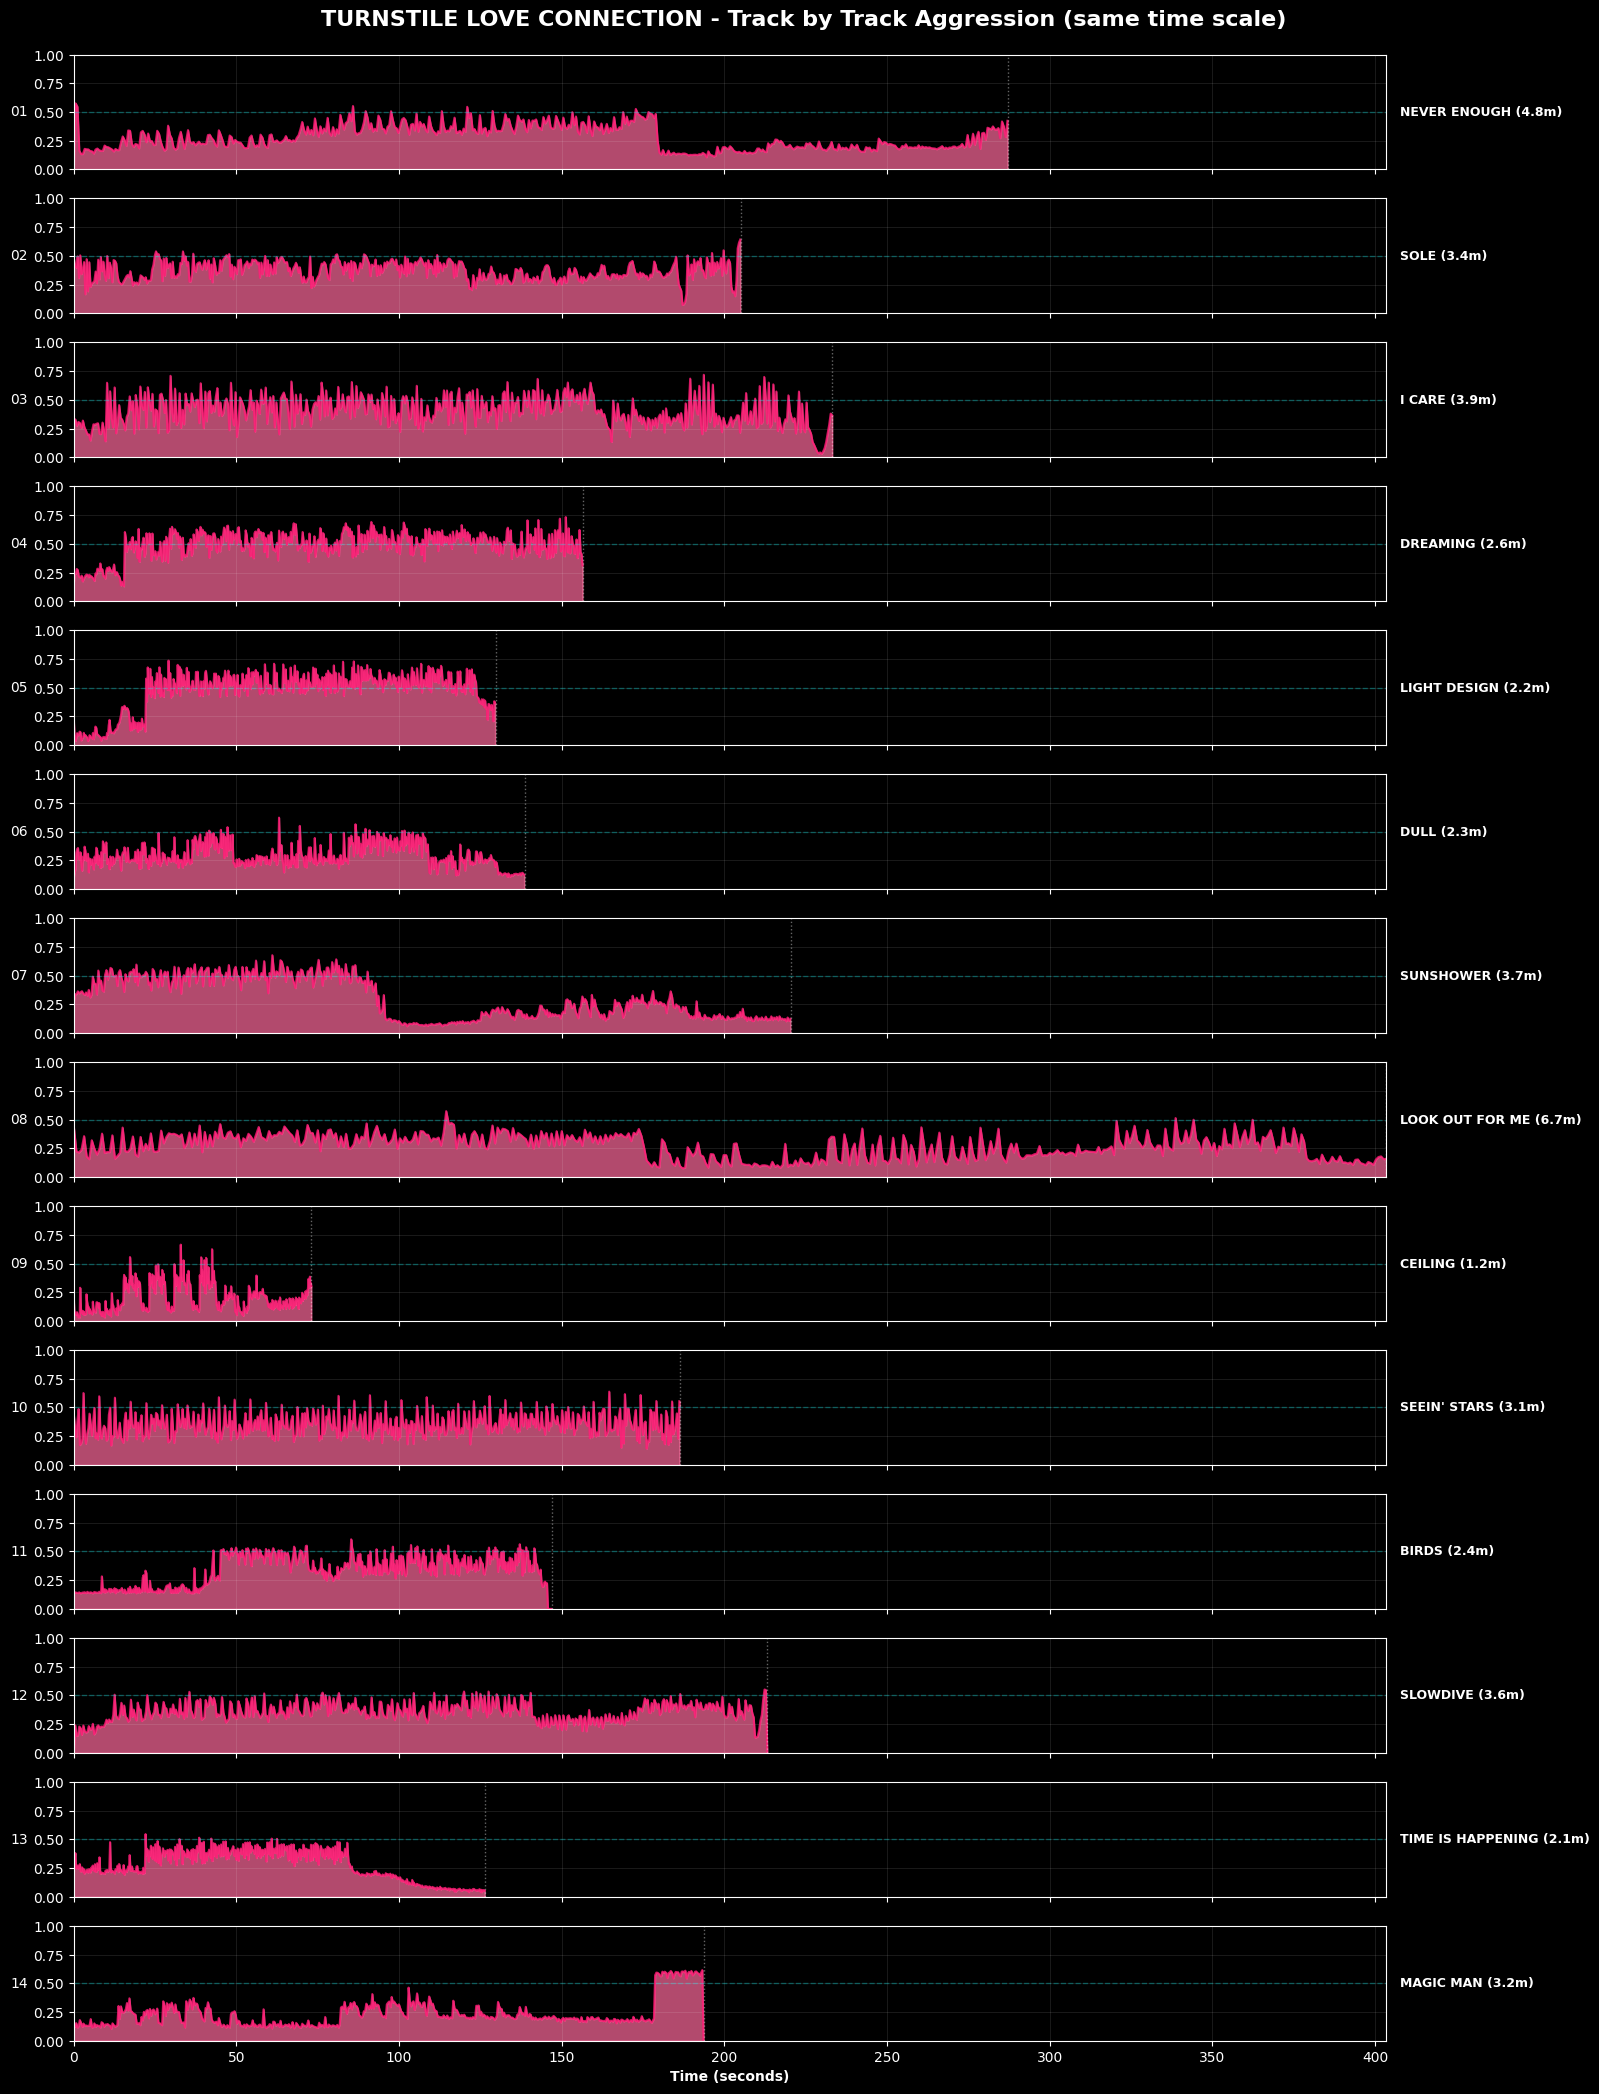

In [47]:
# Create a grid of all tracks
n_tracks = len(tracks)

# Find max duration to set consistent x-axis
max_duration = max(t['duration'] for t in tracks)

fig, axes = plt.subplots(n_tracks, 1, figsize=(16, n_tracks * 1.5), sharex=True)

if n_tracks == 1:
    axes = [axes]

for i, track in enumerate(tracks):
    ax = axes[i]
    
    # Downsample for plotting
    downsample = max(1, len(track['times']) // 500)
    times = track['times'][::downsample]
    agg = track['aggression'][::downsample]
    
    # Plot
    ax.fill_between(times, agg, alpha=0.7, color='#ff6b9d')
    ax.plot(times, agg, color='#ff1a75', linewidth=1.5, alpha=0.8)
    
    # Styling
    ax.set_xlim(0, max_duration)  # Same scale for all tracks
    ax.set_ylim(0, 1)
    ax.set_ylabel(f"{i+1:02d}", fontsize=10, rotation=0, ha='right', va='center')
    ax.axhline(0.5, color='cyan', linestyle='--', alpha=0.3, linewidth=1)
    ax.grid(alpha=0.1)
    
    # Add vertical line at track end to show duration
    ax.axvline(track['duration'], color='white', linestyle=':', alpha=0.4, linewidth=1)
    
    # Title on the right with duration
    duration_min = track['duration'] / 60
    ax.text(1.01, 0.5, f"{track['title']} ({duration_min:.1f}m)", 
            transform=ax.transAxes, 
            fontsize=9, va='center', fontweight='bold')
    
    # Only show x-label on bottom
    if i == n_tracks - 1:
        ax.set_xlabel('Time (seconds)', fontsize=10, fontweight='bold')

plt.suptitle('TURNSTILE LOVE CONNECTION - Track by Track Aggression (same time scale)', 
             fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

## Smoothed Aggression - Interactive
Adjust the smoothing window to see the overall energy arc more clearly.

Output()

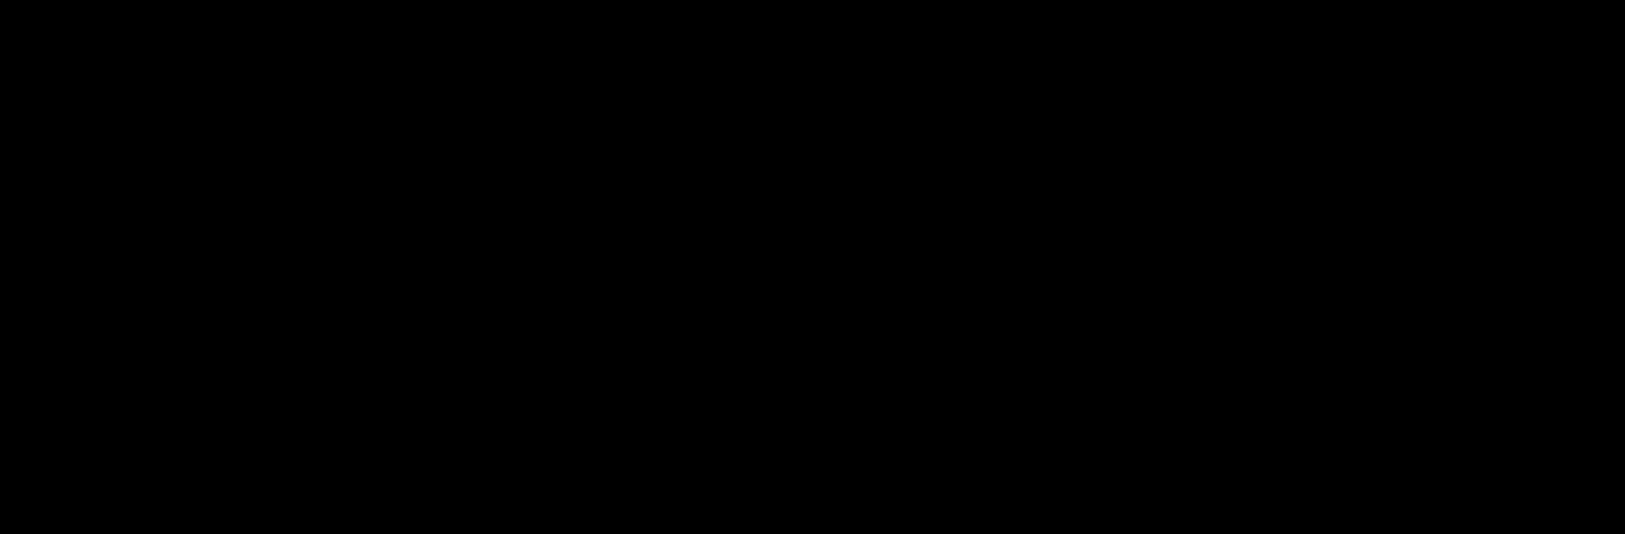

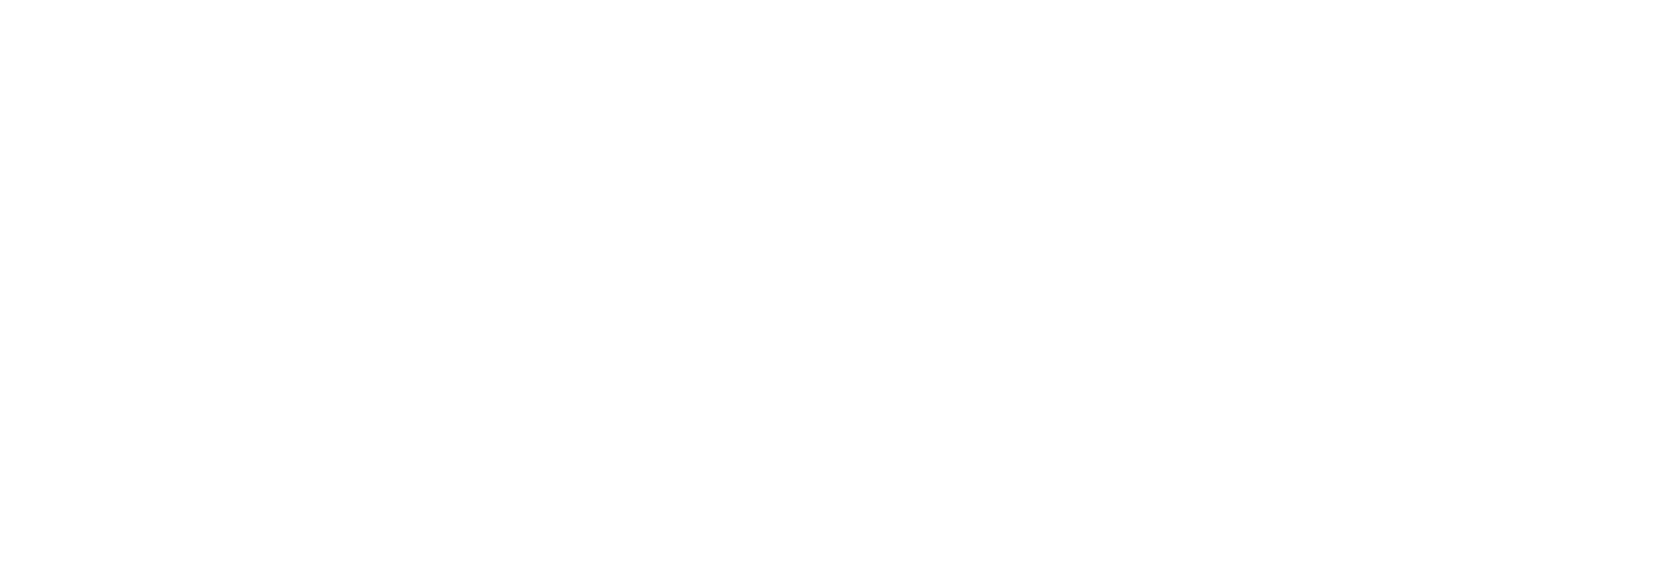

Smoothing window: 50 frames (~1.1 seconds)
Album avg aggression: 0.33
Peak smoothed aggression: 0.62


In [48]:
from scipy.ndimage import uniform_filter1d

# Smoothing slider
smooth_slider = widgets.IntSlider(value=50, min=1, max=500, step=10, description='Smoothing:',
                                   style={'description_width': '80px'}, layout=widgets.Layout(width='400px'))
smooth_output = widgets.Output()

def update_smooth_plot(change=None):
    window = smooth_slider.value
    
    with smooth_output:
        clear_output(wait=True)
        
        # Create continuous album timeline
        album_times = []
        album_aggression = []
        track_boundaries = [0]
        
        current_time = 0
        for track in tracks:
            album_times.extend(track['times'] + current_time)
            album_aggression.extend(track['aggression'])
            current_time += track['duration']
            track_boundaries.append(current_time)
        
        album_times = np.array(album_times)
        album_aggression = np.array(album_aggression)
        
        # Apply smoothing
        album_aggression_smooth = uniform_filter1d(album_aggression, size=window)
        
        # Downsample for plotting
        downsample = max(1, len(album_times) // 2000)
        times_plot = album_times[::downsample]
        agg_raw = album_aggression[::downsample]
        agg_smooth = album_aggression_smooth[::downsample]
        
        # Plot both raw and smoothed
        fig, ax = plt.subplots(figsize=(20, 6))
        
        # Raw (faint)
        ax.fill_between(times_plot, agg_raw, alpha=0.2, color='#ff6b9d', label='Raw')
        
        # Smoothed (bold)
        ax.plot(times_plot, agg_smooth, color='#ff1a75', linewidth=3, alpha=0.9, label=f'Smoothed (window={window})')
        ax.fill_between(times_plot, agg_smooth, alpha=0.5, color='#ff6b9d')
        
        # Track boundaries
        for i, boundary in enumerate(track_boundaries):
            if i == 0:
                continue
            ax.axvline(boundary, color='white', linestyle='-', alpha=0.5, linewidth=1)
            if i < len(tracks):
                ax.text(boundary + 5, 0.95, f"{i+1}", fontsize=9, alpha=0.7, fontweight='bold')
        
        # Styling
        ax.set_ylabel('Aggression Score', fontsize=12, fontweight='bold')
        ax.set_xlabel('Album Timeline (seconds)', fontsize=12, fontweight='bold')
        ax.set_ylim(0, 1)
        ax.axhline(0.5, color='cyan', linestyle='--', alpha=0.5)
        ax.grid(alpha=0.3)
        ax.legend(loc='upper right')
        
        plt.title(f'TURNSTILE LOVE CONNECTION - Smoothed Aggression Arc', fontsize=16, fontweight='bold')
        plt.tight_layout()
        plt.show()
        
        # Show some stats about the smoothed version
        print(f"Smoothing window: {window} frames (~{window * 0.023:.1f} seconds)")
        print(f"Album avg aggression: {np.mean(agg_smooth):.2f}")
        print(f"Peak smoothed aggression: {np.max(agg_smooth):.2f}")

smooth_slider.observe(update_smooth_plot, names='value')

display(widgets.VBox([
    widgets.HTML('<b>Drag slider to adjust smoothing window:</b>'),
    smooth_slider
]))
display(smooth_output)

update_smooth_plot()

## Album Flow - Continuous Energy Arc

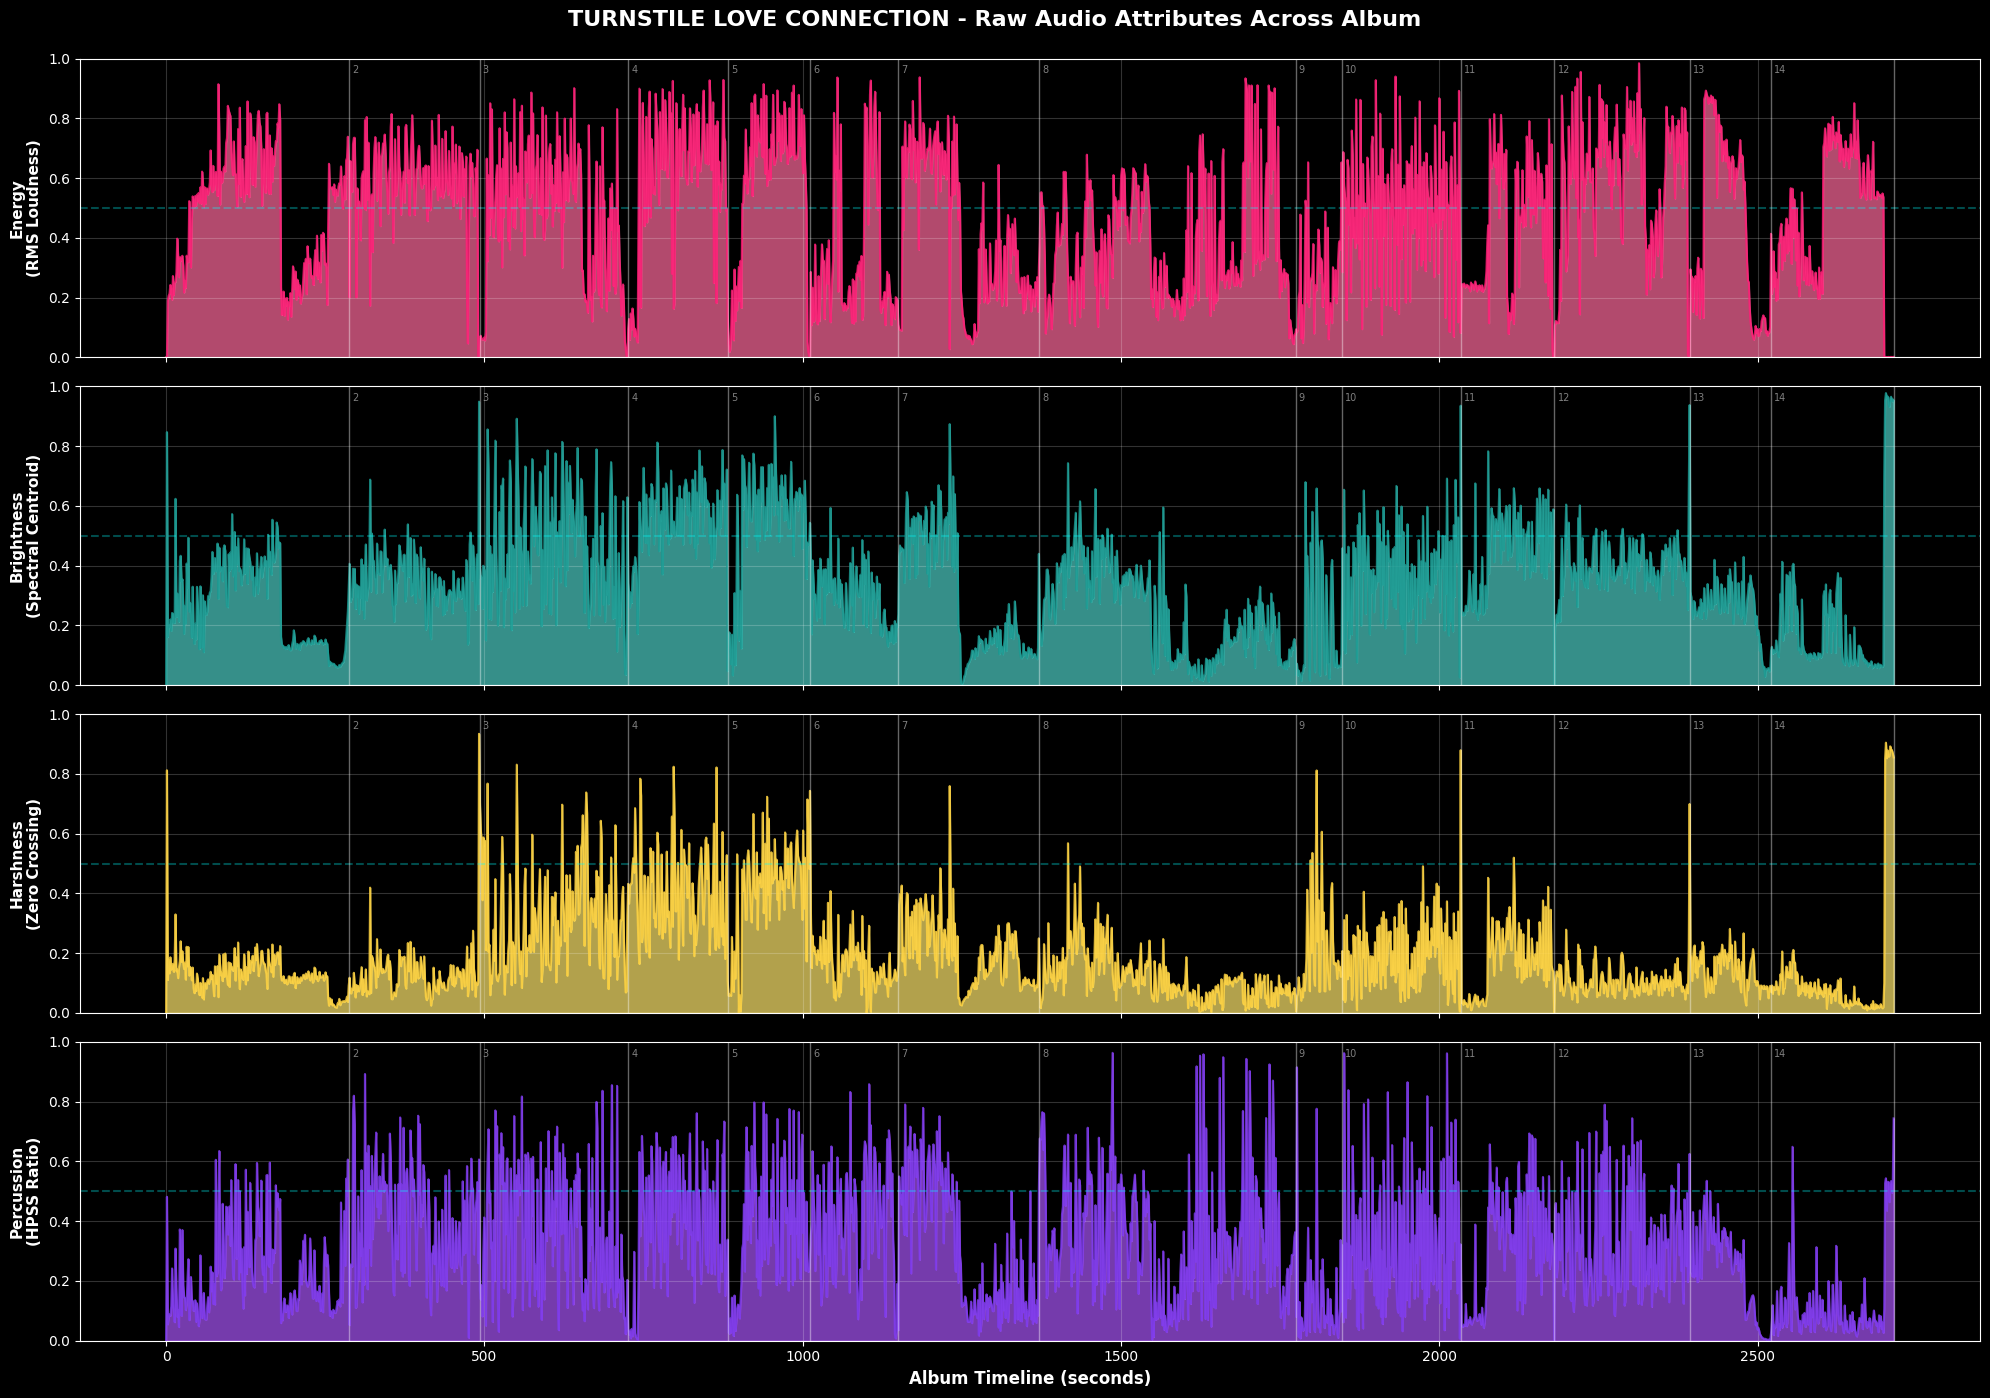

Energy (RMS): Overall loudness/volume
Brightness (Spectral Centroid): High frequency content
Harshness (Zero Crossing): Noisiness/distortion
Percussion (HPSS): Drum/transient presence


In [49]:
# Create continuous album timeline for each attribute
album_times = []
album_energy = []
album_brightness = []
album_harshness = []
album_percussion = []
track_boundaries = [0]

current_time = 0
for track in tracks:
    album_times.extend(track['times'] + current_time)
    album_energy.extend(track['energy'])
    album_brightness.extend(track['brightness'])
    album_harshness.extend(track['harshness'])
    album_percussion.extend(track['percussion'])
    current_time += track['duration']
    track_boundaries.append(current_time)

album_times = np.array(album_times)
album_energy = np.array(album_energy)
album_brightness = np.array(album_brightness)
album_harshness = np.array(album_harshness)
album_percussion = np.array(album_percussion)

# Downsample for plotting
downsample = max(1, len(album_times) // 2000)
times_plot = album_times[::downsample]
energy_plot = album_energy[::downsample]
brightness_plot = album_brightness[::downsample]
harshness_plot = album_harshness[::downsample]
percussion_plot = album_percussion[::downsample]

# Plot all four attributes stacked
fig, axes = plt.subplots(4, 1, figsize=(20, 14), sharex=True)

# Energy
axes[0].fill_between(times_plot, energy_plot, alpha=0.7, color='#ff6b9d')
axes[0].plot(times_plot, energy_plot, color='#ff1a75', linewidth=1.5, alpha=0.8)
axes[0].set_ylabel('Energy\n(RMS Loudness)', fontsize=11, fontweight='bold')
axes[0].set_ylim(0, 1)
axes[0].axhline(0.5, color='cyan', linestyle='--', alpha=0.3)
axes[0].grid(alpha=0.2)

# Brightness
axes[1].fill_between(times_plot, brightness_plot, alpha=0.7, color='#4ecdc4')
axes[1].plot(times_plot, brightness_plot, color='#1a9991', linewidth=1.5, alpha=0.8)
axes[1].set_ylabel('Brightness\n(Spectral Centroid)', fontsize=11, fontweight='bold')
axes[1].set_ylim(0, 1)
axes[1].axhline(0.5, color='cyan', linestyle='--', alpha=0.3)
axes[1].grid(alpha=0.2)

# Harshness
axes[2].fill_between(times_plot, harshness_plot, alpha=0.7, color='#ffe66d')
axes[2].plot(times_plot, harshness_plot, color='#ffd23f', linewidth=1.5, alpha=0.8)
axes[2].set_ylabel('Harshness\n(Zero Crossing)', fontsize=11, fontweight='bold')
axes[2].set_ylim(0, 1)
axes[2].axhline(0.5, color='cyan', linestyle='--', alpha=0.3)
axes[2].grid(alpha=0.2)

# Percussion
axes[3].fill_between(times_plot, percussion_plot, alpha=0.7, color='#a855f7')
axes[3].plot(times_plot, percussion_plot, color='#7c3aed', linewidth=1.5, alpha=0.8)
axes[3].set_ylabel('Percussion\n(HPSS Ratio)', fontsize=11, fontweight='bold')
axes[3].set_xlabel('Album Timeline (seconds)', fontsize=12, fontweight='bold')
axes[3].set_ylim(0, 1)
axes[3].axhline(0.5, color='cyan', linestyle='--', alpha=0.3)
axes[3].grid(alpha=0.2)

# Add track boundaries to all plots
for ax in axes:
    for i, boundary in enumerate(track_boundaries):
        if i == 0:
            continue
        ax.axvline(boundary, color='white', linestyle='-', alpha=0.4, linewidth=1)
        if i < len(tracks):
            ax.text(boundary + 5, 0.95, f"{i+1}", fontsize=7, alpha=0.5)

plt.suptitle('TURNSTILE LOVE CONNECTION - Raw Audio Attributes Across Album', 
             fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

print(f"Energy (RMS): Overall loudness/volume")
print(f"Brightness (Spectral Centroid): High frequency content")
print(f"Harshness (Zero Crossing): Noisiness/distortion")
print(f"Percussion (HPSS): Drum/transient presence")

## Individual Attributes - Energy, Brightness, Harshness

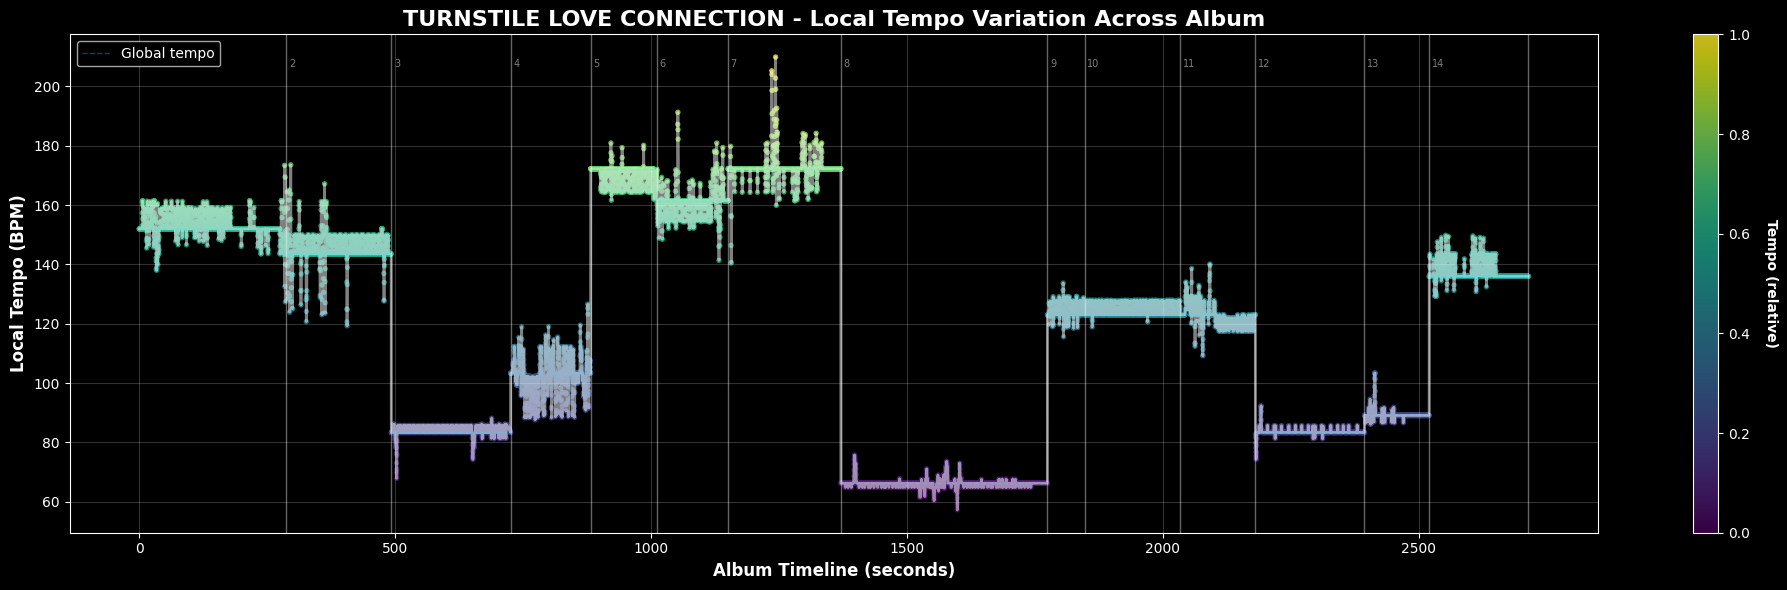

Local tempo range: 57.2 - 209.9 BPM
Tempo variation: 152.7 BPM
Cyan dashed lines show global (average) tempo for each track


In [50]:
# Check if local tempo data is available
if tracks[0]['local_tempo'] is not None:
    # Create continuous album timeline for local tempo
    album_times = []
    album_local_tempo = []
    track_boundaries = [0]

    current_time = 0
    for track in tracks:
        # Use tempo-specific times (downsampled)
        album_times.extend(track['local_tempo_times'] + current_time)
        album_local_tempo.extend(track['local_tempo'])
        current_time += track['duration']
        track_boundaries.append(current_time)

    album_times = np.array(album_times)
    album_local_tempo = np.array(album_local_tempo)

    # Already downsampled, just plot directly
    times_plot = album_times
    tempo_plot = album_local_tempo

    # Plot
    fig, ax = plt.subplots(figsize=(20, 6))

    # Color gradient based on tempo (handle constant tempo case)
    tempo_range = tempo_plot.max() - tempo_plot.min()
    if tempo_range > 0:
        tempo_norm = (tempo_plot - tempo_plot.min()) / tempo_range
    else:
        tempo_norm = np.full_like(tempo_plot, 0.5)  # All same tempo
    
    points = ax.scatter(times_plot, tempo_plot, 
                       c=tempo_norm, cmap='viridis', 
                       s=15, alpha=0.8, edgecolors='none')

    ax.plot(times_plot, tempo_plot, color='white', linewidth=2, alpha=0.5)

    # Add track boundaries
    for i, boundary in enumerate(track_boundaries):
        if i == 0:
            continue
        ax.axvline(boundary, color='white', linestyle='-', alpha=0.4, linewidth=1)
        if i < len(tracks):
            ax.text(boundary + 5, ax.get_ylim()[1] * 0.95, f"{i+1}", 
                    fontsize=7, alpha=0.5)

    # Add global tempo reference lines for each track
    current_time = 0
    for track in tracks:
        ax.hlines(track['tempo'], current_time, current_time + track['duration'],
                 colors='cyan', linestyles='--', alpha=0.3, linewidth=1,
                 label='Global tempo' if current_time == 0 else '')
        current_time += track['duration']

    # Styling
    ax.set_ylabel('Local Tempo (BPM)', fontsize=12, fontweight='bold')
    ax.set_xlabel('Album Timeline (seconds)', fontsize=12, fontweight='bold')
    ax.grid(alpha=0.2)
    ax.legend()

    # Colorbar
    cbar = plt.colorbar(points, ax=ax)
    cbar.set_label('Tempo (relative)', rotation=270, labelpad=20, fontweight='bold')

    plt.title('TURNSTILE LOVE CONNECTION - Local Tempo Variation Across Album', 
              fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

    print(f"Local tempo range: {tempo_plot.min():.1f} - {tempo_plot.max():.1f} BPM")
    print(f"Tempo variation: {tempo_range:.1f} BPM")
    print(f"Cyan dashed lines show global (average) tempo for each track")
else:
    print("⚠️  Local tempo data not available.")
    print("Run: python analyze_all_tracks.py")
    print("This will regenerate analysis files with local tempo included.")

ValueError: x and y must be the same size

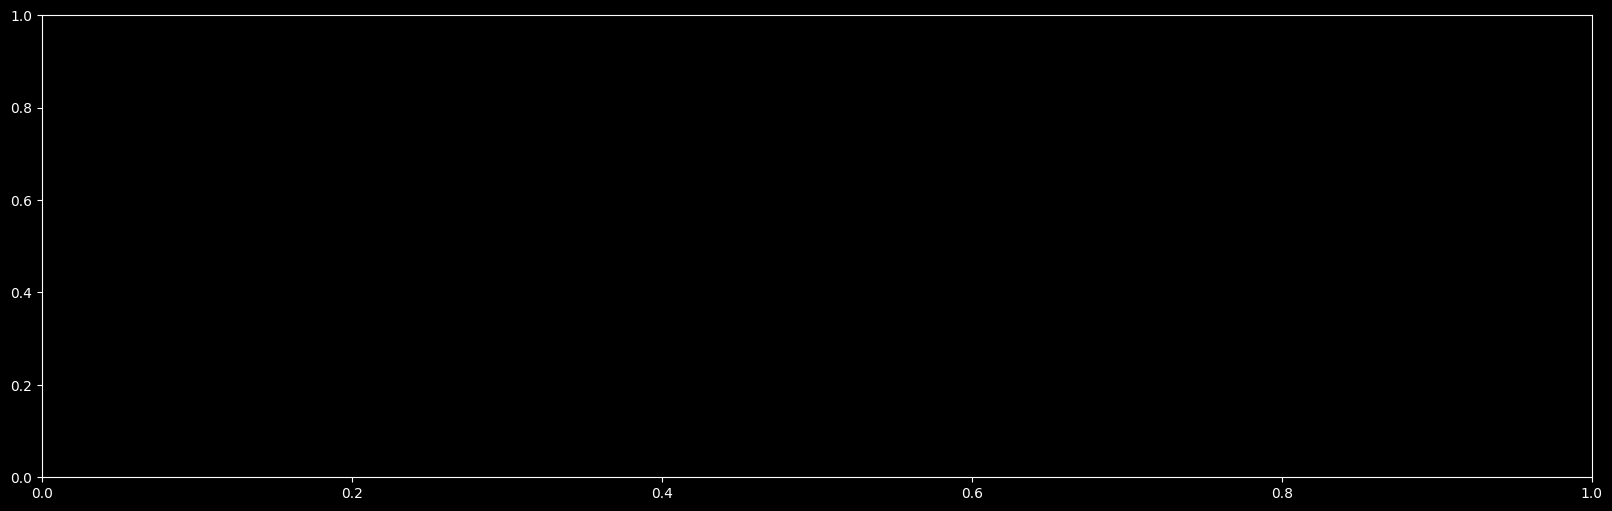

In [51]:
# Check if local tempo data is available
if tracks[0]['local_tempo'] is not None:
    # Create continuous album timeline for local tempo
    album_times = []
    album_local_tempo = []
    track_boundaries = [0]

    current_time = 0
    for track in tracks:
        album_times.extend(track['times'] + current_time)
        album_local_tempo.extend(track['local_tempo'])
        current_time += track['duration']
        track_boundaries.append(current_time)

    album_times = np.array(album_times)
    album_local_tempo = np.array(album_local_tempo)

    # Downsample for plotting
    downsample = max(1, len(album_times) // 2000)
    times_plot = album_times[::downsample]
    tempo_plot = album_local_tempo[::downsample]

    # Plot
    fig, ax = plt.subplots(figsize=(20, 6))

    # Color gradient based on tempo (handle constant tempo case)
    tempo_range = tempo_plot.max() - tempo_plot.min()
    if tempo_range > 0:
        tempo_norm = (tempo_plot - tempo_plot.min()) / tempo_range
    else:
        tempo_norm = np.full_like(tempo_plot, 0.5)  # All same tempo
    
    points = ax.scatter(times_plot, tempo_plot, 
                       c=tempo_norm, cmap='viridis', 
                       s=15, alpha=0.8, edgecolors='none')

    ax.plot(times_plot, tempo_plot, color='white', linewidth=2, alpha=0.5)

    # Add track boundaries
    for i, boundary in enumerate(track_boundaries):
        if i == 0:
            continue
        ax.axvline(boundary, color='white', linestyle='-', alpha=0.4, linewidth=1)
        if i < len(tracks):
            ax.text(boundary + 5, ax.get_ylim()[1] * 0.95, f"{i+1}", 
                    fontsize=7, alpha=0.5)

    # Add global tempo reference lines for each track
    current_time = 0
    for track in tracks:
        ax.hlines(track['tempo'], current_time, current_time + track['duration'],
                 colors='cyan', linestyles='--', alpha=0.3, linewidth=1,
                 label='Global tempo' if current_time == 0 else '')
        current_time += track['duration']

    # Styling
    ax.set_ylabel('Local Tempo (BPM)', fontsize=12, fontweight='bold')
    ax.set_xlabel('Album Timeline (seconds)', fontsize=12, fontweight='bold')
    ax.grid(alpha=0.2)
    ax.legend()

    # Colorbar
    cbar = plt.colorbar(points, ax=ax)
    cbar.set_label('Tempo (relative)', rotation=270, labelpad=20, fontweight='bold')

    plt.title('TURNSTILE LOVE CONNECTION - Local Tempo Variation Across Album', 
              fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

    print(f"Local tempo range: {tempo_plot.min():.1f} - {tempo_plot.max():.1f} BPM")
    print(f"Tempo variation: {tempo_range:.1f} BPM")
    print(f"Cyan dashed lines show global (average) tempo for each track")
else:
    print("⚠️  Local tempo data not available.")
    print("Run: python analyze_all_tracks.py")
    print("This will regenerate analysis files with local tempo included.")

## Local Tempo - Time-Varying BPM (if available)

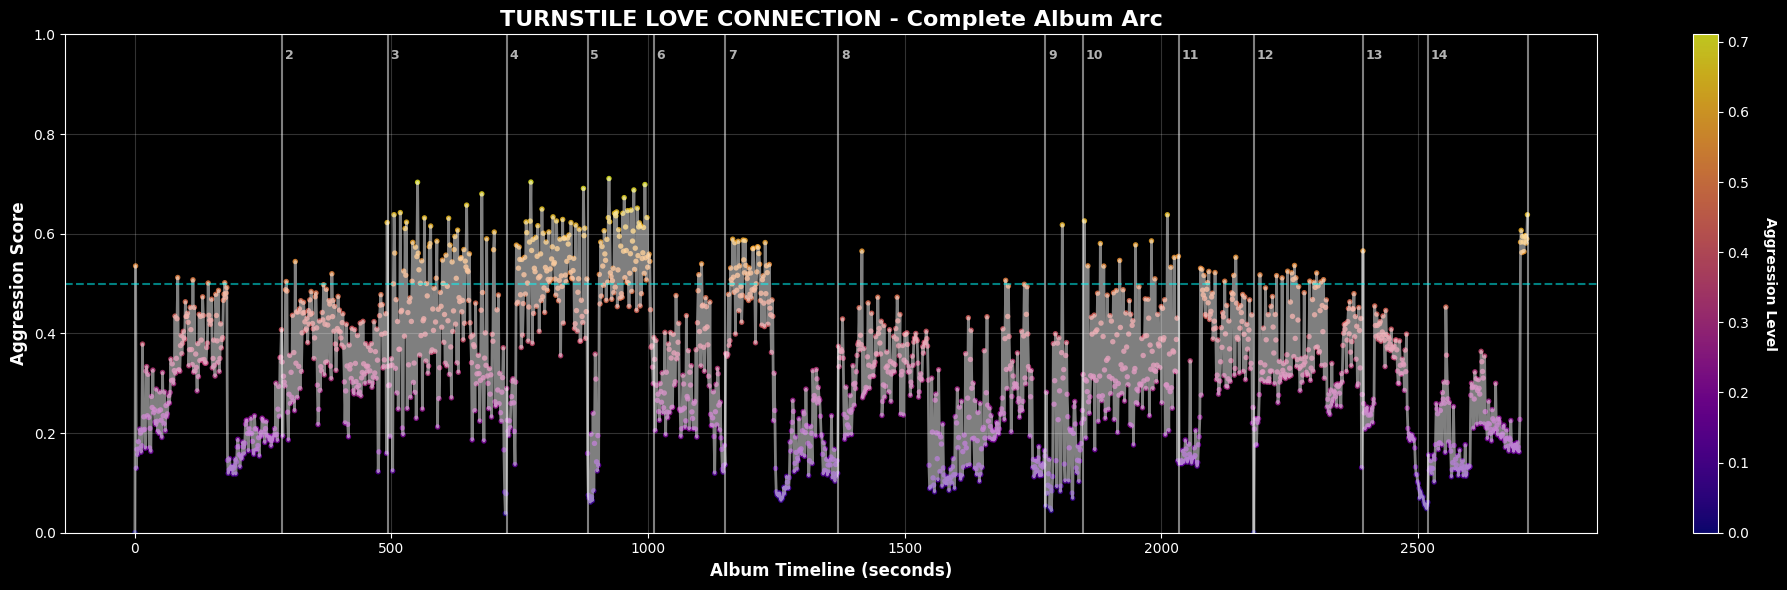

Total album duration: 45.2 minutes
Total tracks: 14


In [52]:
# Create continuous album timeline
album_times = []
album_aggression = []
album_energy = []
track_boundaries = [0]  # Track start times

current_time = 0
for track in tracks:
    # Add track data with offset time
    album_times.extend(track['times'] + current_time)
    album_aggression.extend(track['aggression'])
    album_energy.extend(track['energy'])
    
    current_time += track['duration']
    track_boundaries.append(current_time)

album_times = np.array(album_times)
album_aggression = np.array(album_aggression)
album_energy = np.array(album_energy)

# Downsample for plotting
downsample = max(1, len(album_times) // 2000)
times_plot = album_times[::downsample]
agg_plot = album_aggression[::downsample]
energy_plot = album_energy[::downsample]

# Plot
fig, ax = plt.subplots(figsize=(20, 6))

# Color gradient based on aggression
points = ax.scatter(times_plot, agg_plot, 
                   c=agg_plot, cmap='plasma', 
                   s=15, alpha=0.8, edgecolors='none')

ax.plot(times_plot, agg_plot, color='white', linewidth=2, alpha=0.5)

# Add track boundaries - ALL of them
for i, boundary in enumerate(track_boundaries):
    if i == 0:
        continue  # Skip the very first (0)
    ax.axvline(boundary, color='white', linestyle='-', alpha=0.5, linewidth=1.5)
    
    # Add track number label
    if i < len(tracks):
        ax.text(boundary + 5, 0.95, f"{i+1}", fontsize=9, alpha=0.7, 
                fontweight='bold', color='white')

# Styling
ax.set_ylabel('Aggression Score', fontsize=12, fontweight='bold')
ax.set_xlabel('Album Timeline (seconds)', fontsize=12, fontweight='bold')
ax.set_ylim(0, 1)
ax.axhline(0.5, color='cyan', linestyle='--', alpha=0.5)
ax.grid(alpha=0.2)

# Colorbar
cbar = plt.colorbar(points, ax=ax)
cbar.set_label('Aggression Level', rotation=270, labelpad=20, fontweight='bold')

plt.title('TURNSTILE LOVE CONNECTION - Complete Album Arc', 
          fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print(f"Total album duration: {current_time/60:.1f} minutes")
print(f"Total tracks: {len(tracks)}")

## Track Comparison - Bar Chart

In [53]:
# Export all tracks with aggression scores for p5
p5_export = {
    'album': 'TURNSTILE LOVE CONNECTION',
    'total_duration': float(current_time),
    'tracks': []
}

for track in tracks:
    # Downsample for p5
    downsample = 10
    
    track_data = {
        'title': track['title'],
        'filename': track['filename'],
        'tempo': track['tempo'],
        'duration': track['duration'],
        'frames': {
            'times': track['times'][::downsample].tolist(),
            'energy': track['energy'][::downsample].tolist(),
            'brightness': track['brightness'][::downsample].tolist(),
            'harshness': track['harshness'][::downsample].tolist(),
            'percussion': track['percussion'][::downsample].tolist(),
            'aggression': track['aggression'][::downsample].tolist()
        },
        'beats': track['beats'].tolist(),
        'stats': {
            'avg_aggression': float(np.mean(track['aggression'])),
            'max_aggression': float(np.max(track['aggression'])),
            'min_aggression': float(np.min(track['aggression'])),
            'aggressive_percentage': float((np.sum(track['aggression'] > 0.5) / len(track['aggression'])) * 100),
            'avg_percussion': float(np.mean(track['percussion']))
        }
    }
    
    # Add local tempo if available
    if track['local_tempo'] is not None:
        track_data['frames']['local_tempo'] = track['local_tempo'][::downsample].tolist()
        track_data['frames']['local_tempo_normalized'] = track['local_tempo_norm'][::downsample].tolist()
    
    p5_export['tracks'].append(track_data)

# Save
output_file = 'turnstile_love_connection_p5.json'
with open(output_file, 'w') as f:
    json.dump(p5_export, f, indent=2)

print(f"Exported all {len(tracks)} tracks to {output_file}")
print(f"Total data points per track: ~{len(track['times'][::downsample])}")
print(f"✓ Percussion data included")
if tracks[0]['local_tempo'] is not None:
    print(f"✓ Local tempo data included")

Exported all 14 tracks to turnstile_love_connection_p5.json
Total data points per track: ~835
✓ Percussion data included
✓ Local tempo data included


## Export Combined Data for p5.js

In [54]:
# Export all tracks with aggression scores for p5
p5_export = {
    'album': 'TURNSTILE LOVE CONNECTION',
    'total_duration': float(current_time),
    'tracks': []
}

for track in tracks:
    # Downsample for p5
    downsample = 10
    
    track_data = {
        'title': track['title'],
        'filename': track['filename'],
        'tempo': track['tempo'],
        'duration': track['duration'],
        'frames': {
            'times': track['times'][::downsample].tolist(),
            'energy': track['energy'][::downsample].tolist(),
            'brightness': track['brightness'][::downsample].tolist(),
            'harshness': track['harshness'][::downsample].tolist(),
            'percussion': track['percussion'][::downsample].tolist(),
            'aggression': track['aggression'][::downsample].tolist()
        },
        'beats': track['beats'].tolist(),
        'stats': {
            'avg_aggression': float(np.mean(track['aggression'])),
            'max_aggression': float(np.max(track['aggression'])),
            'min_aggression': float(np.min(track['aggression'])),
            'aggressive_percentage': float((np.sum(track['aggression'] > 0.5) / len(track['aggression'])) * 100),
            'avg_percussion': float(np.mean(track['percussion']))
        }
    }
    
    p5_export['tracks'].append(track_data)

# Save
output_file = 'turnstile_love_connection_p5.json'
with open(output_file, 'w') as f:
    json.dump(p5_export, f, indent=2)

print(f"Exported all {len(tracks)} tracks to {output_file}")
print(f"Total data points per track: ~{len(track['times'][::downsample])}")
print(f"✓ Percussion data included")

Exported all 14 tracks to turnstile_love_connection_p5.json
Total data points per track: ~835
✓ Percussion data included
